In [2]:

import os
import time
import datetime

import torch 
import torch.nn as nn

import neuralnets as neuralnets
import utils as utils

start_file = "best_feb3.pt"
num_classes = 2


# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)
print("Indexing test examples...")
test_loader = utils.get_kaggle_test_loader()
best_model = neuralnets.KaggleNetSimple(num_classes).to(device)
best_model.load_state_dict(torch.load(start_file))


Using device: cuda:0
Indexing test examples...


In [3]:
print (best_model)

KaggleNetSimple(
  (layer1): Sequential(
    (0): Conv2d(3, 96, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Conv2d(96, 96, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Conv2d(96, 192, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
  )
  (layer5): Sequential(
    (0): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
  )
  (layer6): Sequential(
    (0): Conv2d(192, 192, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
  )
  (fc): Linear(in_features=27648, out_features=2, bias=True)
)


In [8]:
print(best_model.layer1)

Sequential(
  (0): Conv2d(3, 96, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


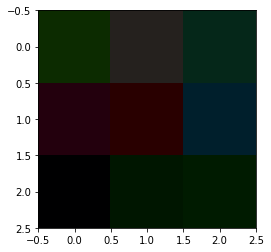

In [10]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

conv1 = nn.Conv2d(3, 1, 3)
weight = conv1.weight.data.numpy()
plt.imshow(weight[0, ...])

2592
torch.Size([96, 3, 3, 3])
82944
82944
165888
331776
331776


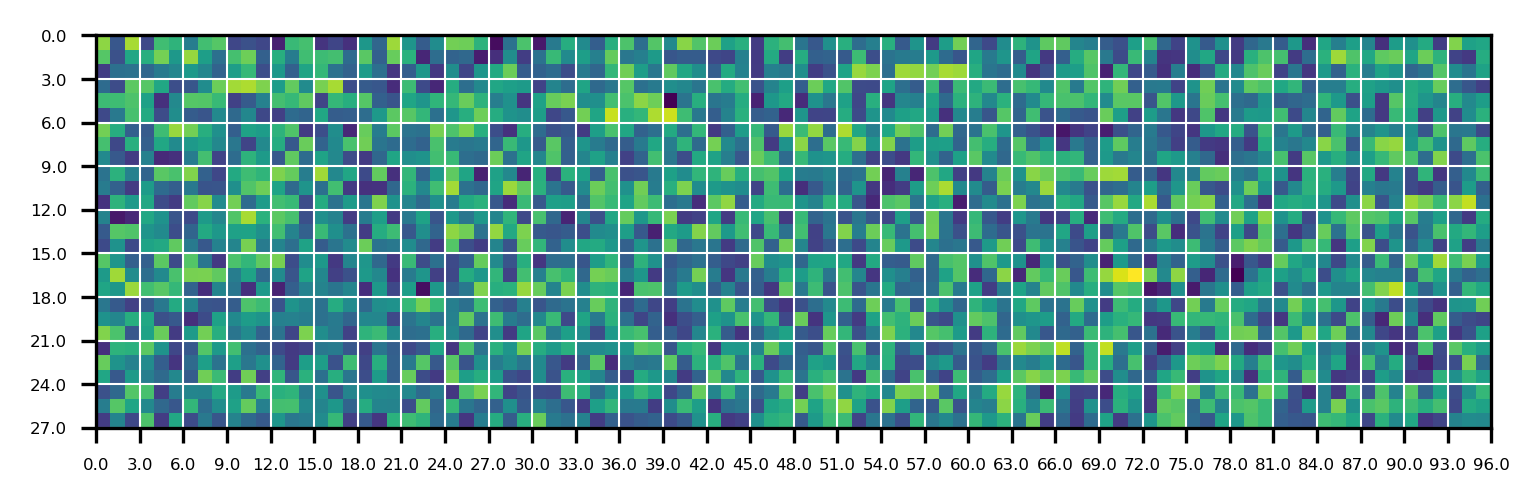

In [71]:
plt.rcParams['figure.dpi']= 300

for m in best_model.modules():
    if isinstance(m, nn.Conv2d):
        flat_size = m.weight.data.flatten().size()[0]
        print(flat_size)
        if flat_size == 3*3*3*96: #We are on the first layer. This is the only one this size
            print(m.weight.data.size())
            plt.figure()
            plt.imshow(m.weight.data.view(3*3*3,96))
            ax = plt.gca()
            ax.set_xticks(np.arange(-0.5, 96, 3));
            ax.set_yticks(np.arange(-0.5, 27, 3));
            ax.set_xticklabels(np.arange(-0.5, 96, 3)+0.5, rotation=0, fontsize=4)
            ax.set_yticklabels(np.arange(-0.5, 96, 3)+0.5, rotation=0, fontsize=4)
            ax.grid(color='w', linestyle='-', linewidth=0.5)
        